In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
bg = cv2.imread("../assets/pct/cropblank.png", cv2.IMREAD_COLOR)
taj = cv2.imread("../extras/taj0039.png", cv2.IMREAD_COLOR)
# taj = cv2.cvtColor(taj, cv2.COLOR_RGB2GRAY)

In [22]:
def get_corr(img, n):
    print(n)
    fg = cv2.imread("../assets/pct/crop{:03d}.png".format(n), cv2.IMREAD_COLOR)
    mask = cv2.imread("../assets/pct/mask{:03d}.png".format(n), cv2.IMREAD_COLOR)
    # mask = cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY)
    # _, mask = cv2.threshold(mask, 5, 255, cv2.THRESH_BINARY)
    
    fg_gray = fg # cv2.cvtColor(fg, cv2.COLOR_RGB2GRAY)
    fg_gray = cv2.resize(fg_gray, (0,0), fx=.78, fy=.78)
    mask_rs = cv2.resize(mask, (0, 0), fx=.78, fy=.78)
    tm = cv2.matchTemplate(taj, fg_gray, cv2.TM_CCORR_NORMED, mask=mask_rs)
    
    minCorr, maxCorr, minLoc, maxLoc = cv2.minMaxLoc(tm)
    return (maxCorr, maxLoc)

In [23]:
corrslocs = [get_corr(taj, n) for n in range(40)]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [24]:
corrs

(647.17138671875,
 921.58544921875,
 1275.031982421875,
 1289.508544921875,
 1145.548583984375,
 1134.1533203125,
 949.381591796875,
 569.64599609375,
 1081.083984375,
 969.268798828125,
 875.09765625,
 1796.46875,
 1781.86474609375,
 1507.08837890625,
 1419.90380859375,
 1401.8583984375,
 1212.93701171875,
 1124.0205078125,
 1312.6904296875,
 1205.966796875,
 2186.64208984375,
 2059.4794921875,
 1969.146728515625,
 2184.9189453125,
 2191.570556640625,
 2326.29931640625,
 2296.572998046875,
 1314.15283203125,
 2280.364013671875,
 2235.563232421875,
 1645.68212890625,
 1487.44775390625,
 1548.382568359375,
 1714.41259765625,
 2004.852294921875,
 2054.5869140625,
 1909.298828125,
 863.041015625,
 1976.552734375,
 1889.87939453125)

In [25]:
corrs, locs = list(zip(*corrslocs))

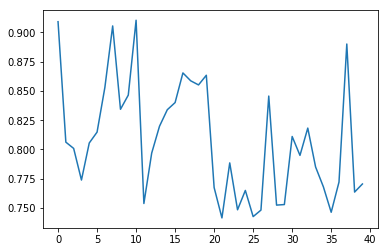

In [26]:
plt.plot(range(40), corrs)

In [27]:
sorted(list(zip(range(100),corrs,locs)),key=lambda a:-a[1])

[(10, 0.9102505445480347, (138, 465)),
 (0, 0.9090046286582947, (138, 464)),
 (7, 0.9053959250450134, (677, 465)),
 (37, 0.88996821641922, (678, 465)),
 (16, 0.8653101325035095, (138, 464)),
 (19, 0.8633117079734802, (138, 465)),
 (17, 0.8585841655731201, (677, 465)),
 (18, 0.8550773859024048, (139, 464)),
 (6, 0.8529044389724731, (138, 464)),
 (9, 0.8463844060897827, (138, 464)),
 (27, 0.8455650806427002, (677, 465)),
 (15, 0.8400207757949829, (138, 464)),
 (8, 0.8342864513397217, (138, 464)),
 (14, 0.8339178562164307, (138, 464)),
 (13, 0.8198135495185852, (139, 464)),
 (32, 0.8182470202445984, (678, 464)),
 (5, 0.8148093819618225, (138, 464)),
 (30, 0.8110827803611755, (138, 464)),
 (1, 0.8062491416931152, (144, 464)),
 (4, 0.8055430054664612, (138, 464)),
 (2, 0.8009114861488342, (677, 464)),
 (12, 0.7969093918800354, (677, 464)),
 (31, 0.7949661016464233, (673, 465)),
 (22, 0.7885525226593018, (677, 464)),
 (33, 0.7851019501686096, (678, 465)),
 (3, 0.7739378213882446, (138, 464))